In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..")
from utils import *
from svm import *
from linear_regression import *
from softmax import *
from features import *
from kernel import *

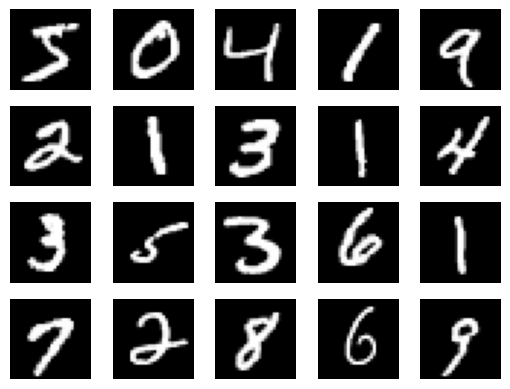

In [2]:
#######################################################################
# 1. Introduction
#######################################################################

# Load MNIST data:
train_x, train_y, test_x, test_y = get_MNIST_data()
# Plot the first 20 images of the training set.
plot_images(train_x[0:20, :])


In [3]:
# TODO: first fill out functions in linear_regression.py, otherwise the functions below will not work


def run_linear_regression_on_MNIST(lambda_factor=1):
    """
    Trains linear regression, classifies test data, computes test error on test set

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    train_x_bias = np.hstack([np.ones([train_x.shape[0], 1]), train_x])
    test_x_bias = np.hstack([np.ones([test_x.shape[0], 1]), test_x])
    theta = closed_form(train_x_bias, train_y, lambda_factor)
    test_error = compute_test_error_linear(test_x_bias, test_y, theta)
    return test_error


# Don't run this until the relevant functions in linear_regression.py have been fully implemented.
print('Linear Regression test_error =', run_linear_regression_on_MNIST(lambda_factor=1))

Linear Regression test_error = 0.7697


In [4]:
# TODO: first fill out functions in svm.py, or the functions below will not work

def run_svm_one_vs_rest_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    train_y[train_y != 0] = 1
    test_y[test_y != 0] = 1
    pred_test_y = one_vs_rest_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error


print('SVM one vs. rest test_error:', run_svm_one_vs_rest_on_MNIST())

c:\Users\Eduardo\miniconda3\envs\6.86x\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM one vs. rest test_error: 0.007499999999999951


In [5]:
from svm import *
def run_multiclass_svm_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    pred_test_y = multi_class_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error


print('Multiclass SVM test_error:', run_multiclass_svm_on_MNIST())

c:\Users\Eduardo\miniconda3\envs\6.86x\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Multiclass SVM test_error: 0.08189999999999997


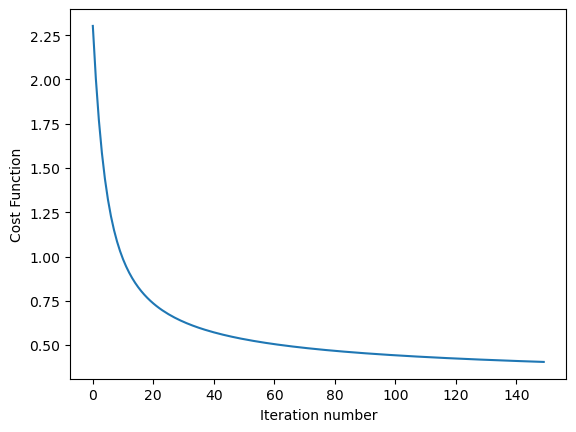

error_mod3= 0.07679999999999998
softmax test_error= 0.10050000000000003


In [ ]:
#######################################################################
# 4. Multinomial (Softmax) Regression and Gradient Descent
#######################################################################

# TODO: first fill out functions in softmax.py, or run_softmax_on_MNIST will not work


def run_softmax_on_MNIST(temp_parameter=1):
    """
    Trains softmax, classifies test data, computes test error, and plots cost function

    Runs softmax_regression on the MNIST training set and computes the test error using
    the test set. It uses the following values for parameters:
    alpha = 0.3
    lambda = 1e-4
    num_iterations = 150

    Saves the final theta to ./theta.pkl.gz

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    theta, cost_function_history = softmax_regression(train_x, train_y, temp_parameter, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
    plot_cost_function_over_time(cost_function_history)
    test_error = compute_test_error(test_x, test_y, theta, temp_parameter)
    # Save the model parameters theta obtained from calling softmax_regression to disk.
    write_pickle_data(theta, "./theta.pkl.gz")

    # TODO: add your code here for the "Using the Current Model" question in tab 6.
    #      and print the test_error_mod3

    return test_error


print('softmax test_error=', run_softmax_on_MNIST(temp_parameter=1))


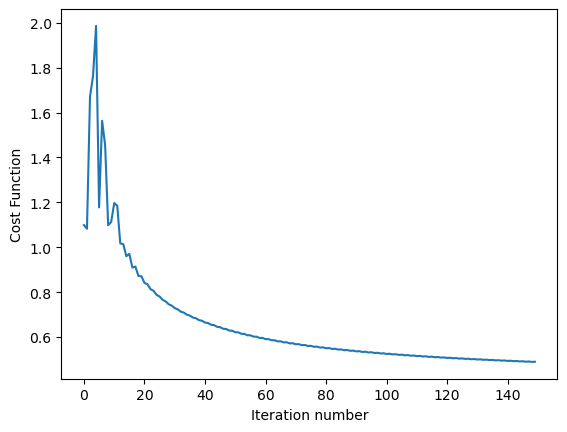

softmax test_error_mod3= 0.18810000000000004


In [7]:
def run_softmax_on_MNIST_mod3(temp_parameter=1):
    """
    Trains softmax regression on MNIST data with labels modified to be mod 3, 
    classifies test data, computes test error, and plots the cost function.

    Runs softmax_regression on the MNIST training set with labels mod 3 and computes 
    the test error using the test set. It uses the following values for parameters:
    alpha = 0.3
    lambda = 1e-4
    num_iterations = 150

    Saves the final theta to ./theta_mod3.pkl.gz

    Returns:
        Final test error for mod 3 classification
    """
    # Load MNIST data
    train_x, train_y, test_x, test_y = get_MNIST_data()
    
    # Update labels to be mod 3
    train_y_mod3, test_y_mod3 = update_y(train_y, test_y)
    
    # Train softmax regression with mod 3 labels
    theta, cost_function_history = softmax_regression(
        train_x, 
        train_y_mod3, 
        temp_parameter=temp_parameter, 
        alpha=0.3, 
        lambda_factor=1.0e-4, 
        k=3,  # Only 3 classes: 0, 1, 2 (mod 3)
        num_iterations=150
    )
    
    # Plot cost function over time
    plot_cost_function_over_time(cost_function_history)
    
    # Compute test error for mod 3 classification
    test_error_mod3 = compute_test_error(test_x, test_y_mod3, theta, temp_parameter)
    
    # Save the model parameters theta obtained from calling softmax_regression to disk.
    write_pickle_data(theta, "./theta_mod3.pkl.gz")
    
    return test_error_mod3


print('softmax test_error_mod3=', run_softmax_on_MNIST_mod3(temp_parameter=1))

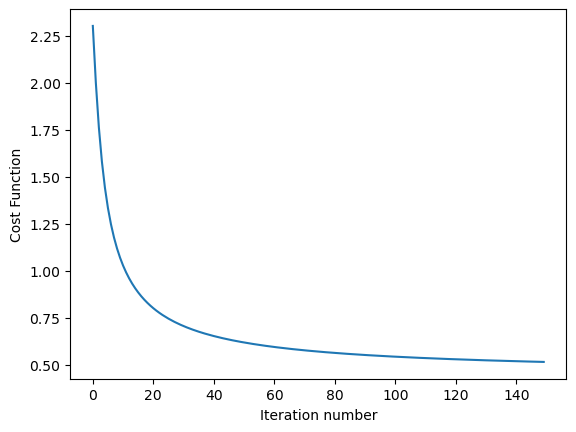

softmax test_error_pca= 0.14759999999999995


In [10]:
def run_softmax_on_MNIST_with_PCA(temp_parameter=1):
    """
    Trains softmax regression on an 18-dimensional PCA representation of the MNIST dataset,
    classifies test data, computes test error, and plots the cost function.

    Runs softmax_regression on the PCA-reduced MNIST training set and computes the test error
    using the test set. It uses the following values for parameters:
    alpha = 0.3
    lambda = 1e-4
    num_iterations = 150

    Saves the final theta to ./theta_pca.pkl.gz

    Returns:
        Final test error for PCA-reduced features
    """
    # Load MNIST data
    train_x, train_y, test_x, test_y = get_MNIST_data()
    
    # Compute feature means from training data
    feature_means = np.mean(train_x, axis=0)
    
    # Compute principal components using training data
    pcs = principal_components(train_x)
    
    # Project training and test data onto the first 18 principal components
    n_components = 18
    train_x_pca = project_onto_PC(train_x, pcs, n_components, feature_means)
    test_x_pca = project_onto_PC(test_x, pcs, n_components, feature_means)
    
    # Train softmax regression on PCA-reduced training data
    theta, cost_function_history = softmax_regression(
        train_x_pca,
        train_y,
        temp_parameter=temp_parameter,
        alpha=0.3,
        lambda_factor=1.0e-4,
        k=10,
        num_iterations=150
    )
    
    # Plot cost function over time
    plot_cost_function_over_time(cost_function_history)
    
    # Compute test error for PCA-reduced features
    test_error_pca = compute_test_error(test_x_pca, test_y, theta, temp_parameter)
    
    # Save the model parameters theta obtained from calling softmax_regression to disk.
    write_pickle_data(theta, "./theta_pca.pkl.gz")
    
    return test_error_pca


print('softmax test_error_pca=', run_softmax_on_MNIST_with_PCA(temp_parameter=1))

c:\Users\Eduardo\OneDrive\AreaDeTrabalho\Programacao\projects\mit_6.86x\digit_recognition\mnist\part1\softmax.py:74: RuntimeWarning: divide by zero encountered in log
  log_correct_class_probabilities = np.log(correct_class_probabilities)


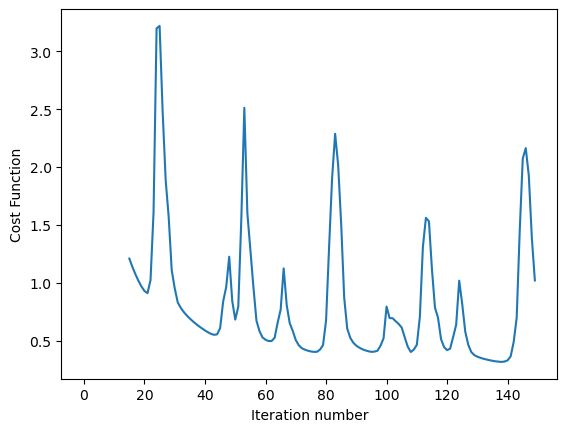

softmax test_error_cubic= 0.09199999999999997


In [12]:
def run_softmax_on_MNIST_with_cubic_features(temp_parameter=1):
    """
    Trains softmax regression on a cubic feature mapping of a 10-dimensional PCA representation
    of the MNIST dataset, classifies test data, computes test error, and plots the cost function.

    Runs softmax_regression on the cubic-feature-mapped PCA-reduced MNIST training set and computes
    the test error using the test set. It uses the following values for parameters:
    alpha = 0.3
    lambda = 1e-4
    num_iterations = 150

    Saves the final theta to ./theta_cubic.pkl.gz

    Returns:
        Final test error for cubic-feature-mapped PCA-reduced features
    """
    # Load MNIST data
    train_x, train_y, test_x, test_y = get_MNIST_data()
    
    # Compute feature means from training data
    feature_means = np.mean(train_x, axis=0)
    
    # Compute principal components using training data
    pcs = principal_components(train_x)
    
    # Project training and test data onto the first 10 principal components
    n_components = 10
    train_x_pca = project_onto_PC(train_x, pcs, n_components, feature_means)
    test_x_pca = project_onto_PC(test_x, pcs, n_components, feature_means)
    
    # Apply cubic feature mapping to PCA-reduced data
    train_x_cubic = cubic_features(train_x_pca)
    test_x_cubic = cubic_features(test_x_pca)
    
    # Train softmax regression on cubic-feature-mapped training data
    theta, cost_function_history = softmax_regression(
        train_x_cubic,
        train_y,
        temp_parameter=temp_parameter,
        alpha=0.3,
        lambda_factor=1.0e-4,
        k=10,
        num_iterations=150
    )
    
    # Plot cost function over time
    plot_cost_function_over_time(cost_function_history)
    
    # Compute test error for cubic-feature-mapped PCA-reduced features
    test_error_cubic = compute_test_error(test_x_cubic, test_y, theta, temp_parameter)
    
    # Save the model parameters theta obtained from calling softmax_regression to disk.
    write_pickle_data(theta, "./theta_cubic.pkl.gz")
    
    return test_error_cubic


print('softmax test_error_cubic=', run_softmax_on_MNIST_with_cubic_features(temp_parameter=1))